### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup
import requests

<h1><center>10 days weather forcasts of Benguerir</center></h1>

In [3]:
html = requests.get("https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111")

soup = BeautifulSoup(html.content, 'lxml') #create an instance of the BeautifulSoup class to parse our document

In [4]:
container = soup.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")

## 1- Implement a scraping script for getting 10 days weather forecasts of Benguerir city.

In [5]:
list=[]
for items in container:
    for i in range(1,11):
        # create empty dictionary
        dict = {}
        try:  
            # assign value to given key
            dict["Date"]= items.find_all('h3', class_ = 'DetailsSummary--daypartName--kbngc')[i].text
            dict["Desc"]= items.find_all('span', class_= 'DetailsSummary--extendedData--307Ax')[i].text
            dict["High temp"]= items.find_all('span', class_ = 'DetailsSummary--highTempValue--3PjlX')[i].text
            dict["Low temp"]= items.find_all('span', class_ = 'DetailsSummary--lowTempValue--2tesQ')[i].text
            dict["Precip"]= items.find_all('div', class_= 'DetailsSummary--precip--1a98O')[i].text
            dict["Wind"]= items.find_all('span', class_ = 'Wind--windWrapper--3Ly7c undefined')[i].text
        except: 
            # assign None values if no items are there with specified class
            dict["day"]="None"
            dict["desc"]="None"
            dict["high temp"]="None"
            dict["low temp"]="None"
            dict["precip"]="None"
            dict["wind"]="None"
 
        # append dictionary values to the list
        list.append(dict)   
    

## 2- Store the data sets into Pandas DataFrame.

In [6]:
df_bg = pd.DataFrame(list)
print(df_bg)

     Date           Desc High temp Low temp   Precip        Wind
0  Sun 18  Partly Cloudy       72°      47°  Rain14%   SSE 7 mph
1  Mon 19  Partly Cloudy       73°      45°   Rain8%     E 7 mph
2  Tue 20   Mostly Sunny       73°      45°   Rain8%    SW 8 mph
3  Wed 21          Sunny       70°      45°   Rain8%   ENE 8 mph
4  Thu 22          Sunny       71°      43°  Rain10%   ENE 8 mph
5  Fri 23          Sunny       72°      43°   Rain8%     S 7 mph
6  Sat 24          Sunny       72°      44°   Rain5%     S 7 mph
7  Sun 25   Mostly Sunny       71°      45°   Rain8%     E 8 mph
8  Mon 26   Mostly Sunny       71°      49°   Rain7%  SSE 11 mph
9  Tue 27  Partly Cloudy       69°      46°   Rain1%    S 10 mph


<h1><center>10 days weather forcasts of Tangier</center></h1>

In [7]:
html1 = requests.get("https://weather.com/weather/tenday/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c")

soup_t = BeautifulSoup(html1.content, 'lxml') #create an instance of the BeautifulSoup class to parse our document

In [8]:
container = soup_t.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")

## 1- Implement a scraping script for getting 10 days weather forecasts of Benguerir city.

In [9]:
list=[]
for items in container:
    for i in range(1,11):
        # create empty dictionary
        dict = {}
        try:  
            # assign value to given key
            dict["Date"]= items.find_all('h3', class_ = 'DetailsSummary--daypartName--kbngc')[i].text
            dict["Desc"]= items.find_all('span', class_= 'DetailsSummary--extendedData--307Ax')[i].text
            dict["High temp"]= items.find_all('span', class_ = 'DetailsSummary--highTempValue--3PjlX')[i].text
            dict["Low temp"]= items.find_all('span', class_ = 'DetailsSummary--lowTempValue--2tesQ')[i].text
            dict["Precip"]= items.find_all('div', class_= 'DetailsSummary--precip--1a98O')[i].text
            dict["Wind"]= items.find_all('span', class_ = 'Wind--windWrapper--3Ly7c undefined')[i].text
        except: 
            # assign None values if no items are there with specified class
            dict["day"]="None"
            dict["desc"]="None"
            dict["high temp"]="None"
            dict["low temp"]="None"
            dict["precip"]="None"
            dict["wind"]="None"
 
        # append dictionary values to the list
        list.append(dict)  

## 2- Store the data sets into Pandas DataFrame.

In [10]:
df_tg = pd.DataFrame(list)
print(df_tg)

     Date           Desc High temp Low temp   Precip        Wind
0  Sun 18  Partly Cloudy       69°      58°  Rain14%    E 14 mph
1  Mon 19  Partly Cloudy       70°      54°  Rain14%     E 9 mph
2  Tue 20     PM Showers       71°      59°  Rain42%  SSE 11 mph
3  Wed 21        Showers       67°      56°  Rain52%    SW 7 mph
4  Thu 22  AM Fog/PM Sun       66°      54°  Rain14%   NNW 4 mph
5  Fri 23          Sunny       67°      54°  Rain12%   SSW 4 mph
6  Sat 24   Mostly Sunny       67°      55°  Rain24%    SW 5 mph
7  Sun 25        Showers       67°      57°  Rain36%   ESE 8 mph
8  Mon 26  Partly Cloudy       67°      57°  Rain22%    E 12 mph
9  Tue 27  Partly Cloudy       66°      57°  Rain22%  ESE 11 mph


## 3- Use matplotlib library to plot the raining days of the two cities in the same figure.

To do so let's, first encode categorical features as an integer array as follows:

In [11]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_bg["state_to_code"] = ord_enc.fit_transform(df_bg[["Desc"]])
df_tg["state_to_code"] = ord_enc.fit_transform(df_tg[["Desc"]])

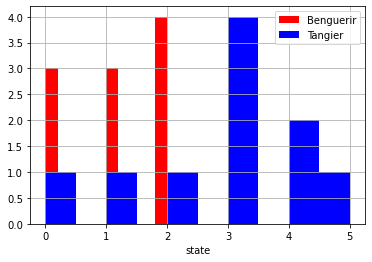

In [12]:
plt.hist(df_bg['state_to_code'],color='r', label='Benguerir')
plt.hist(df_tg['state_to_code'],color='b', label='Tangier')
plt.xlabel("state")
plt.legend()
plt.grid()
plt.show() 